**Import the libraries:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

**Loading the dataset:**

In [ ]:
data = pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#adding the age [age = rings + 1.5]
data['Age'] = data.Rings + 1.5

#renaming
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


**Visualizations:**


 **1.Univariate Analysis**

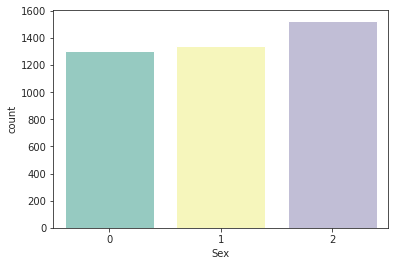

In [ ]:
sb.countplot(x = data.Sex,palette = 'Set3')


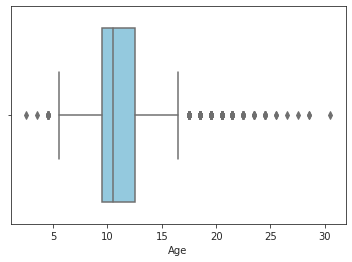

In [ ]:
sb.boxplot(x=data.Age,color='skyblue') 


In [ ]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Age']].mean().sort_values('Age')


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


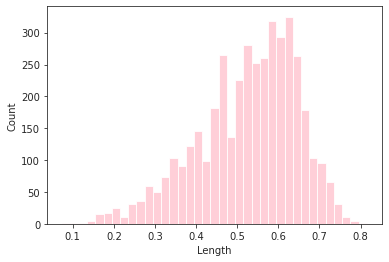

In [ ]:
sb.histplot(x=data.Length,color='pink') 


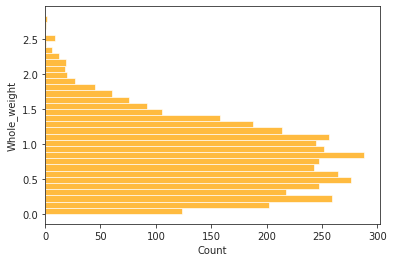

In [ ]:
sb.histplot(y=data.Whole_weight,color = "orange")

**2. Bi-Variate Analysis**

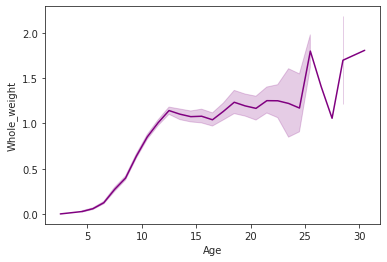

In [ ]:
Age = data.Age
Whole_weight = data.Whole_weight
sb.lineplot(x = Age, y = Whole_weight, color = 'purple')


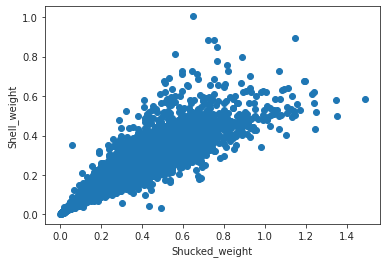

In [ ]:
plt.scatter(data.Shucked_weight,data.Shell_weight)
plt.xlabel("Shucked_weight")
plt.ylabel("Shell_weight")
sb.set_style('ticks')


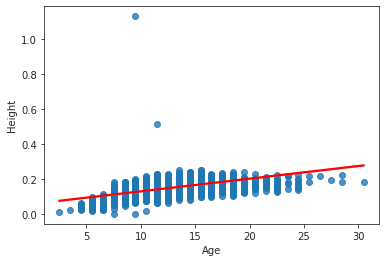

In [ ]:
sb.regplot(x=data.Age,y=data.Height,scatter={"color" :"blue"},line_kws={"color":"red"}) 


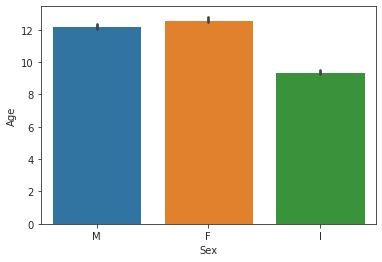

In [ ]:
sb.barplot(x=data.Sex,y=data.Age)


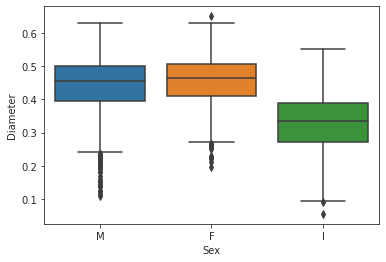

In [ ]:
sb.boxplot (x=data.Sex,y=data.Diameter, data=data) 
plt.show()


**3.Multi-Variate Analysis**

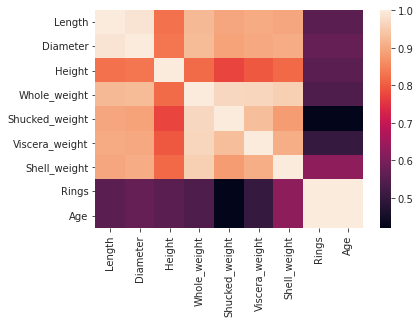

In [ ]:
corr = data.corr()
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


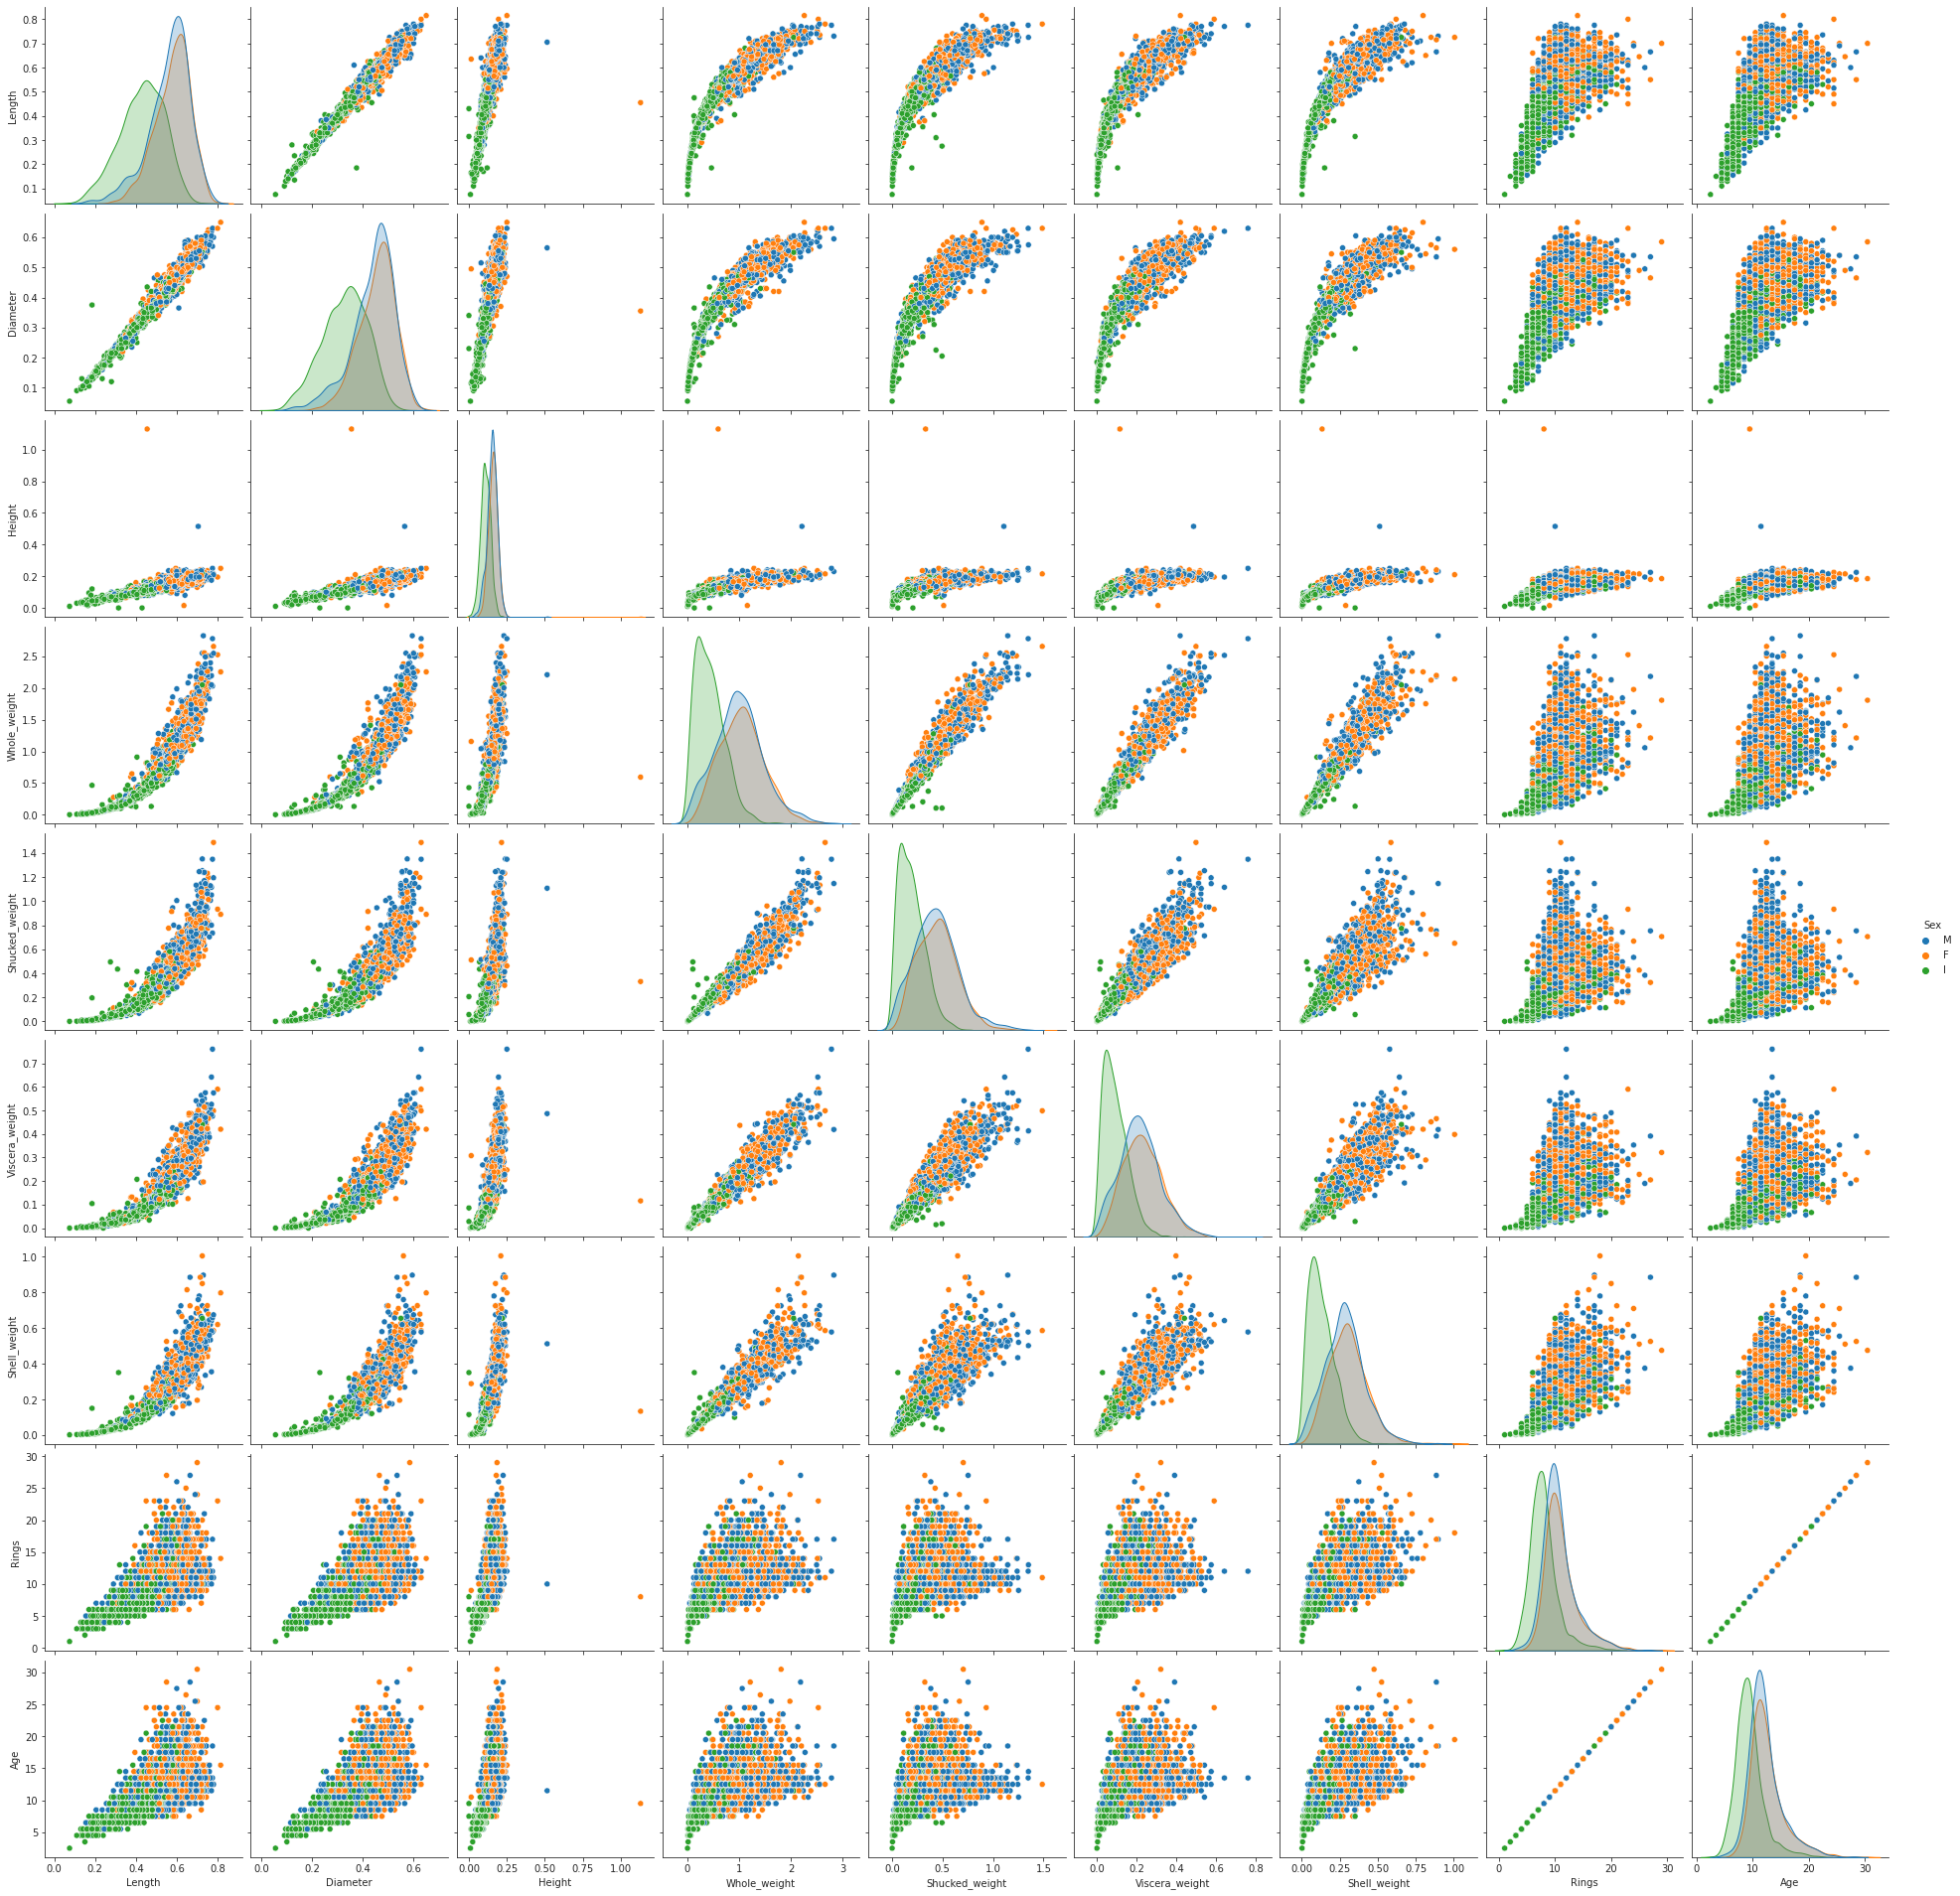

In [ ]:
sb.pairplot (data, hue="Sex", size=3)
plt.show()


**Descriptive statistics:**

In [ ]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


**Checking for null values:**

In [ ]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Age               0
dtype: int64

**Outliers handling:**

In [ ]:
outliers=data.quantile(q=(0.25,0.75))
outliers


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0,12.5


In [ ]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Rings              9.0000
Age               10.5000
dtype: float64

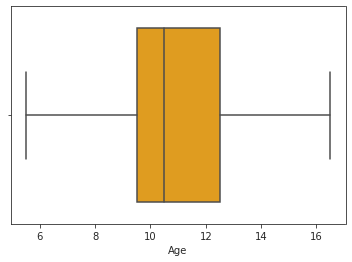

In [ ]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sb.boxplot(x=data.Age,showfliers = False,color = 'orange')


**Encoding**

In [ ]:
encode = LabelEncoder()
data.Sex = encode.fit_transform(data.Sex)
data

#2 - men; 0 - female; 1 -infant

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


**Independent and Dependent Variables:**






In [ ]:
#independent variable
x = data.iloc[:,:8]

#dependent variable
y = data.iloc[:,8:]
 

In [ ]:
x.shape

(4177, 8)

In [ ]:
y.shape

(4177, 1)

In [ ]:
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
y

,Age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5
...,...
4172,12.5
4173,11.5
4174,10.5
4175,11.5


**Scaling:**

In [ ]:
from sklearn import preprocessing
#min-max scaling
min_max_scaler = preprocessing.MinMaxScaler()
new_x = min_max_scaler.fit_transform(x)
print(new_x)

[[1.         0.51351351 0.5210084  ... 0.15030262 0.1323239  0.14798206]
 [1.         0.37162162 0.35294118 ... 0.06624075 0.06319947 0.06826109]
 [0.         0.61486486 0.61344538 ... 0.17182246 0.18564845 0.2077728 ]
 ...
 [1.         0.70945946 0.70588235 ... 0.3527236  0.37788018 0.30543099]
 [0.         0.74324324 0.72268908 ... 0.35642233 0.34298881 0.29347285]
 [1.         0.85810811 0.84033613 ... 0.63517149 0.49506254 0.49177877]]


In [ ]:
#standardisation scaling
standardisation = preprocessing.StandardScaler()
new_x = standardisation.fit_transform(x)
print(new_x)

[[ 1.15198011 -0.57455813 -0.43214879 ... -0.60768536 -0.72621157
  -0.63821689]
 [ 1.15198011 -1.44898585 -1.439929   ... -1.17090984 -1.20522124
  -1.21298732]
 [-1.28068972  0.05003309  0.12213032 ... -0.4634999  -0.35668983
  -0.20713907]
 ...
 [ 1.15198011  0.6329849   0.67640943 ...  0.74855917  0.97541324
   0.49695471]
 [-1.28068972  0.84118198  0.77718745 ...  0.77334105  0.73362741
   0.41073914]
 [ 1.15198011  1.54905203  1.48263359 ...  2.64099341  1.78744868
   1.84048058]]


**Split the data into training and testing:**










In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

**Model building --> Train and Test the model:**


In [ ]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)


LinearRegression()

In [ ]:
mlr.predict(x_test[0:5])

array([[10.17854317],
       [15.55584652],
       [10.04595256],
       [ 9.70156827],
       [10.56422425]])

In [ ]:
x_test[0:5]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
2247,0,0.470,0.365,0.12,0.5430,0.2295,0.1495,0.1500
794,2,0.580,0.465,0.16,1.0345,0.3150,0.2600,0.3635
265,0,0.460,0.380,0.13,0.6390,0.3000,0.1525,0.1600
2086,0,0.710,0.500,0.15,1.3165,0.6835,0.2815,0.2800
1288,1,0.505,0.380,0.12,0.5940,0.2595,0.1435,0.1800


In [ ]:
y_test[0:5]

,Age
2247,10.5
794,13.5
265,12.5
2086,11.5
1288,8.5


In [ ]:
from sklearn.metrics import r2_score
r2_score(mlr.predict(x_test),y_test)

0.19430631885484784